In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
%matplotlib inline
plt.style.use('ggplot')
from impala.dbapi import connect
import warnings
warnings.filterwarnings('ignore')
pd.set_option('max_colwidth',1000)
from matplotlib.font_manager import FontProperties
chinese = FontProperties(fname = 'C:/Windows/Fonts/msyh.ttc')
plt.rcParams['font.sans-serif'] = [u'SimHei']
plt.rcParams['axes.unicode_minus'] = False

In [2]:
df = pd.read_csv("D:/GitHub/datasets/shop_order_190101_190731.csv")

In [3]:
order_date_min = df.groupby('user_id').create_date.min()
order_date_min = pd.to_datetime(order_date_min)
order_date_max = df.groupby('user_id').create_date.max()
order_date_max = pd.to_datetime(order_date_max)

In [4]:
print(order_date_max[0:10])
print(order_date_min[0:10])

user_id
3    2019-02-23 13:17:00
11   2019-04-18 17:57:00
13   2019-04-29 02:36:00
16   2019-04-06 21:35:00
35   2019-05-29 10:41:00
37   2019-04-29 02:06:00
39   2019-04-29 09:38:00
58   2019-03-07 09:56:00
68   2019-03-20 07:53:00
69   2019-07-24 20:51:00
Name: create_date, dtype: datetime64[ns]
user_id
3    2019-02-23 13:17:00
11   2019-04-18 17:57:00
13   2019-04-29 02:36:00
16   2019-04-04 22:21:00
35   2019-05-29 10:41:00
37   2019-01-13 23:51:00
39   2019-01-25 21:02:00
58   2019-03-07 09:56:00
68   2019-02-13 13:05:00
69   2019-07-24 20:51:00
Name: create_date, dtype: datetime64[ns]


In [5]:
life_time = (order_date_max-order_date_min).reset_index()

In [6]:
life_time.sort_values(by="create_date",ascending=False)

,user_id,create_date
36276,3050892,209 days 00:34:00
78660,9879824,206 days 11:22:00
25655,2248569,203 days 23:36:00
20335,1812971,203 days 01:32:00
24271,2128921,201 days 23:55:00
66998,8180521,201 days 15:39:00
21954,1971399,199 days 05:43:00
26730,2307806,197 days 23:45:00
59707,6455309,196 days 15:25:00
62713,7021911,196 days 00:38:00


In [7]:
liucun = pd.merge(left = df, 
                  right = order_date_min.reset_index(), 
                  how = 'inner', 
                  on = 'user_id', 
                  suffixes=('', '_min'))


In [8]:
liucun.head()

,user_id,create_date,payable_rmb_amount,buy_num,date,month,create_date_min
0,3059210,2019/1/1 7:32,7.0,1,2019/1/1,2019/1/1,2019-01-01 07:32:00
1,3059210,2019/2/11 20:54,7.0,1,2019/2/11,2019/2/1,2019-01-01 07:32:00
2,2055349,2019/1/1 7:38,7.0,1,2019/1/1,2019/1/1,2019-01-01 07:38:00
3,9457140,2019/1/1 8:46,7.0,1,2019/1/1,2019/1/1,2019-01-01 08:46:00
4,9457140,2019/1/24 10:44,0.1,1,2019/1/24,2019/1/1,2019-01-01 08:46:00


In [9]:
liucun["create_date"] = pd.to_datetime(liucun["create_date"])
liucun.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 213843 entries, 0 to 213842
Data columns (total 7 columns):
user_id               213843 non-null int64
create_date           213843 non-null datetime64[ns]
payable_rmb_amount    213843 non-null float64
buy_num               213843 non-null int64
date                  213843 non-null object
month                 213843 non-null object
create_date_min       213843 non-null datetime64[ns]
dtypes: datetime64[ns](2), float64(1), int64(2), object(2)
memory usage: 13.1+ MB


In [10]:
liucun["order_date_diff"] = liucun.create_date - liucun.create_date_min
liucun['date_diff'] = liucun.order_date_diff.apply(lambda x: x/np.timedelta64(1,'D'))


In [11]:
liucun.head()

,user_id,create_date,payable_rmb_amount,buy_num,date,month,create_date_min,order_date_diff,date_diff
0,3059210,2019-01-01 07:32:00,7.0,1,2019/1/1,2019/1/1,2019-01-01 07:32:00,0 days 00:00:00,0.000000
1,3059210,2019-02-11 20:54:00,7.0,1,2019/2/11,2019/2/1,2019-01-01 07:32:00,41 days 13:22:00,41.556944
2,2055349,2019-01-01 07:38:00,7.0,1,2019/1/1,2019/1/1,2019-01-01 07:38:00,0 days 00:00:00,0.000000
3,9457140,2019-01-01 08:46:00,7.0,1,2019/1/1,2019/1/1,2019-01-01 08:46:00,0 days 00:00:00,0.000000
4,9457140,2019-01-24 10:44:00,0.1,1,2019/1/24,2019/1/1,2019-01-01 08:46:00,23 days 01:58:00,23.081944


In [12]:
liucun = liucun.sort_values(by="order_date_diff",ascending=True)

In [13]:
def diff(group):
    d = group.date_diff - group.date_diff.shift(-1)
    return d

In [14]:
last_diff = liucun.groupby('user_id').apply(diff)

Text(0.5, 1.0, '用户平均购买周期直方图')

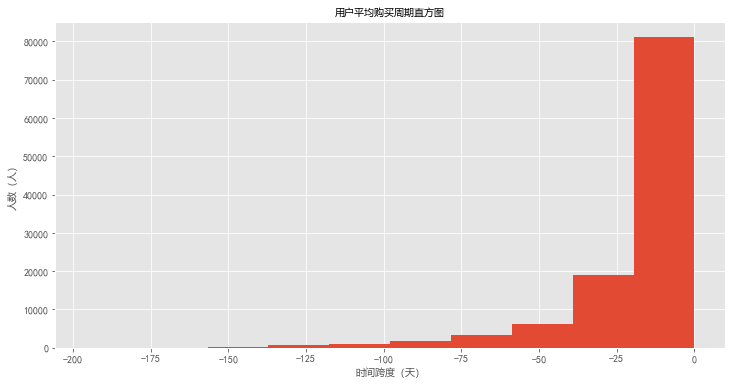

In [27]:
fig, ax = plt.subplots(figsize = (12,6))
ax = last_diff.hist(bins = 10)
ax.set_xlabel('时间跨度（天）', fontproperties=chinese) 
ax.set_ylabel('人数（人）', fontproperties=chinese) 
# ax.set_xticks(range(1, 70))
ax.set_title('用户平均购买周期直方图', fontproperties=chinese)

In [20]:
last2 = last_diff.reset_index()

In [21]:
last2["date_diff"].value_counts()

-8.000000     8409
-9.000000     2968
-10.000000    1859
-11.000000    1188
-12.000000     847
-13.000000     596
-14.000000     531
-16.000000     455
-0.000694      426
-15.000000     323
 0.000000      320
-17.000000     244
-0.001389      211
-8.000694      209
-18.000000     207
-7.999306      203
-19.000000     191
-8.000694      190
-8.000000      181
-7.999306      160
-7.995139      153
-7.999306      144
-20.000000     133
-8.000000      122
-7.997917      121
-8.999306      116
-8.004861      115
-7.997222      114
-0.002083      112
-8.000000      111
              ... 
-62.707639       1
-17.987500       1
-32.618056       1
-6.172917        1
-15.394444       1
-32.881944       1
-18.240972       1
-26.134028       1
-49.624306       1
-65.975694       1
-29.588194       1
-28.000000       1
-1.961111        1
-20.295139       1
-37.076389       1
-8.533333        1
-44.606250       1
-84.957639       1
-39.009028       1
-13.153472       1
-18.664583       1
-37.420833  